!jt -t chesterish
# !jt -r

In [11]:
from genetic_algorithm import *
from numpy.random import default_rng
import pickle

import binascii


import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
%matplotlib notebook

import copy
from collections import Counter
import pandas as pd

In [12]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 10

## world size
world_size = 30
world_size_x = world_size
world_size_y = world_size

## generations

0


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 300.24it/s]


<IPython.core.display.Javascript object>


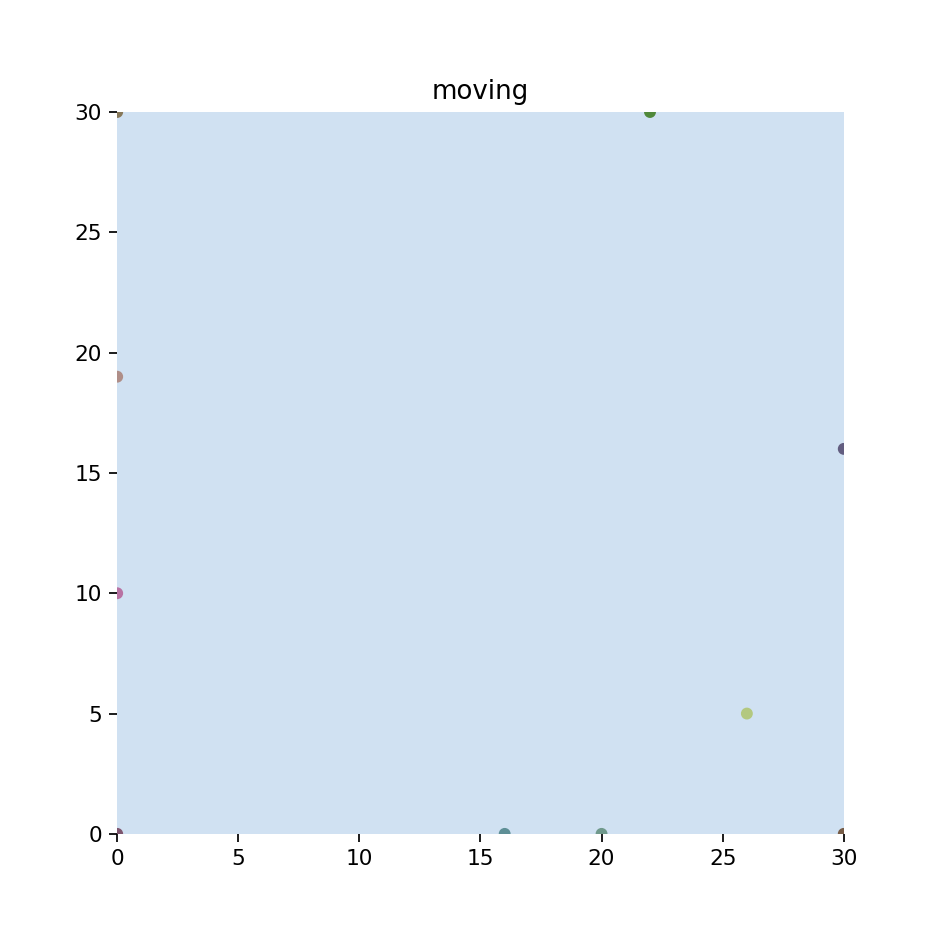

MovieWriter imagemagick unavailable; using Pillow instead.


1


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 283.03it/s]


<IPython.core.display.Javascript object>


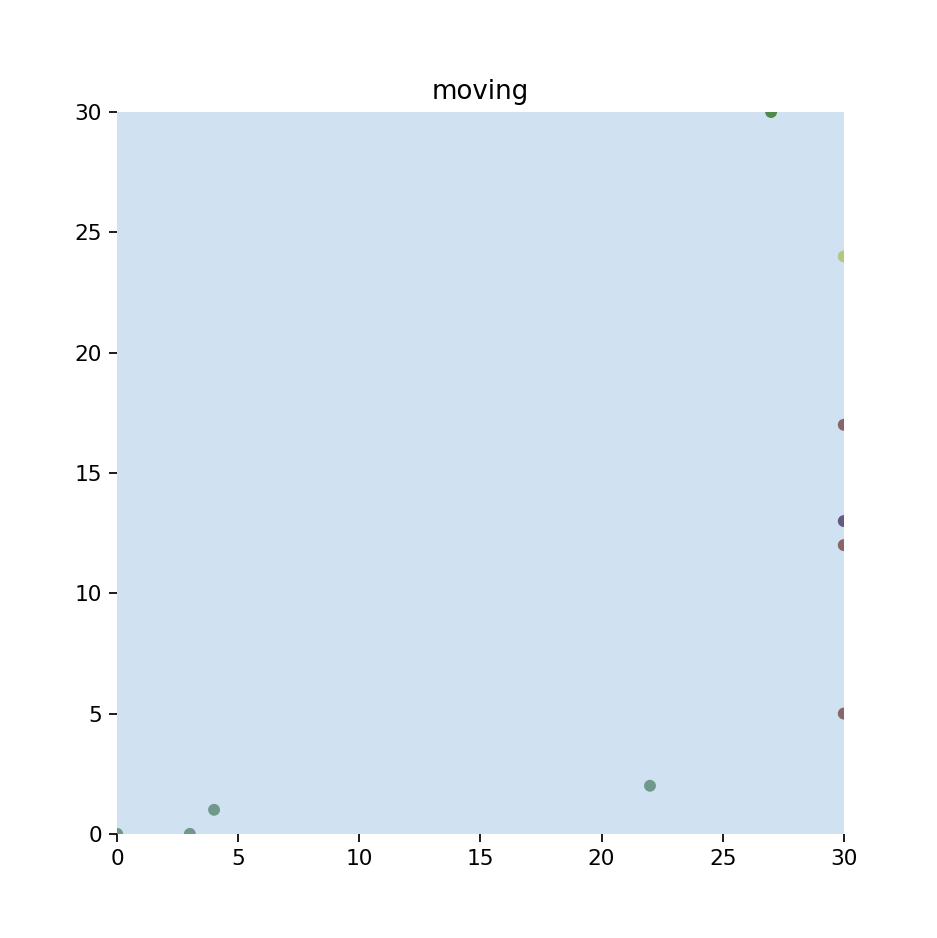

MovieWriter imagemagick unavailable; using Pillow instead.


2


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 200.02it/s]


<IPython.core.display.Javascript object>


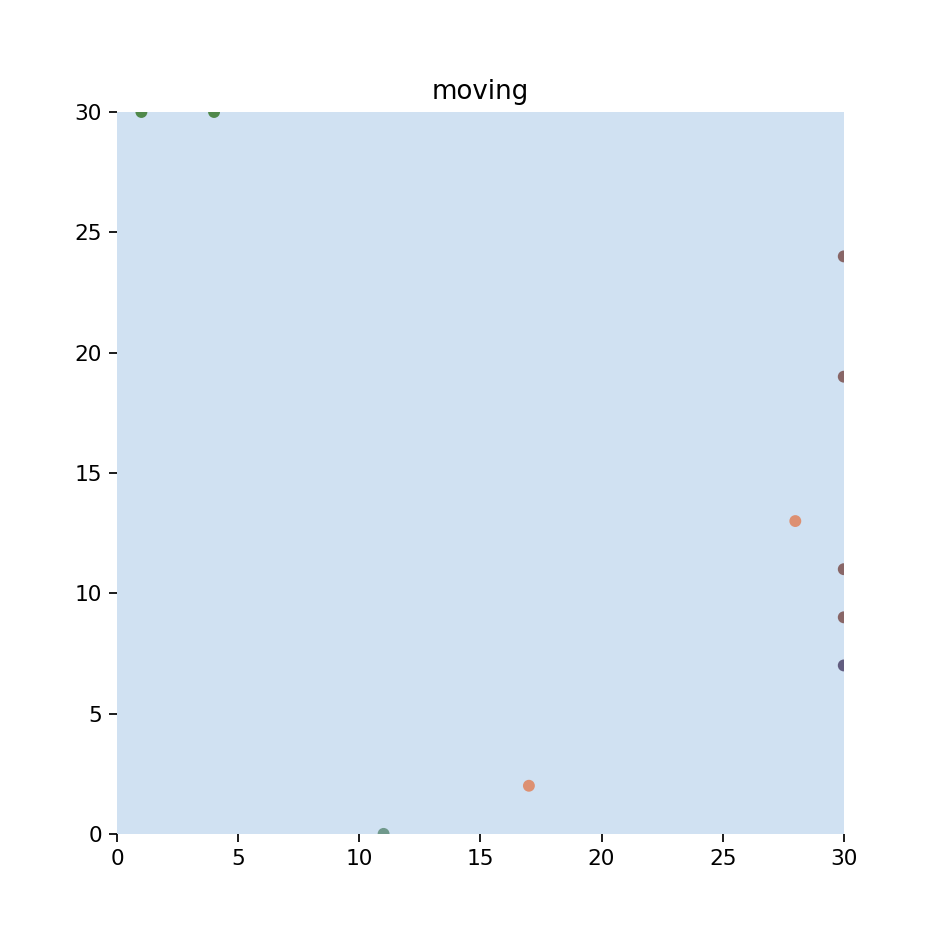

MovieWriter imagemagick unavailable; using Pillow instead.


3


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 302.99it/s]


<IPython.core.display.Javascript object>


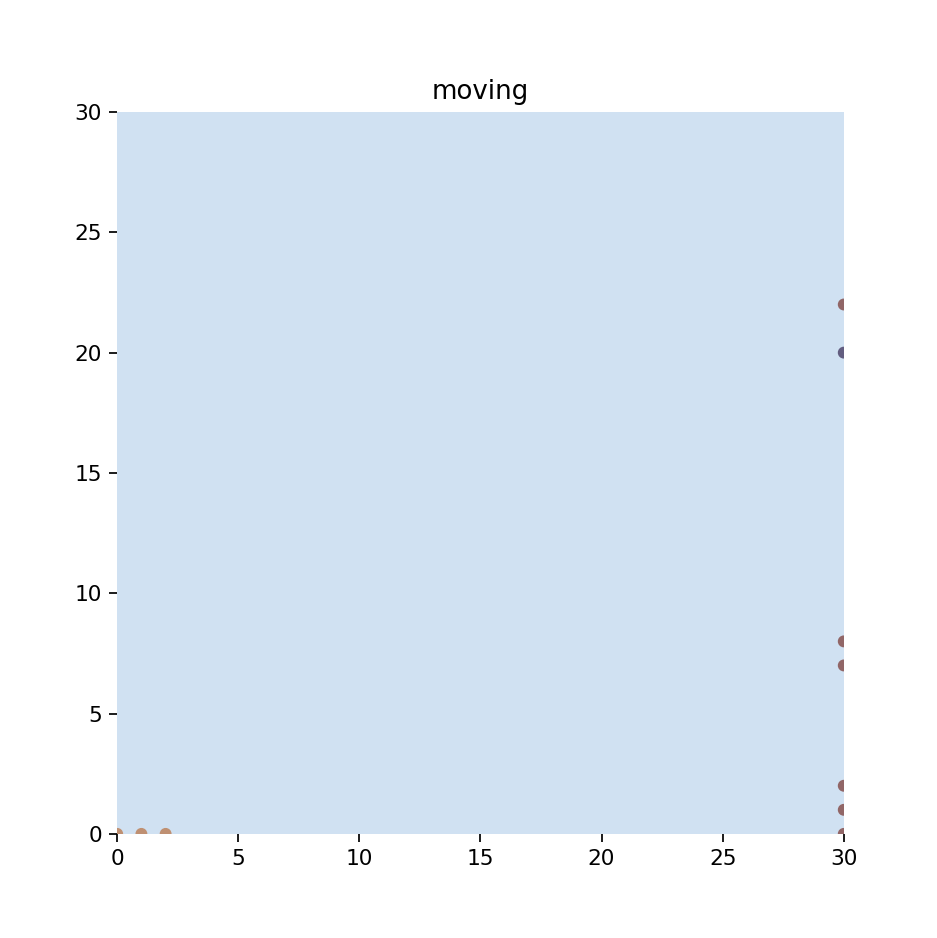

MovieWriter imagemagick unavailable; using Pillow instead.


4


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 417.82it/s]


<IPython.core.display.Javascript object>


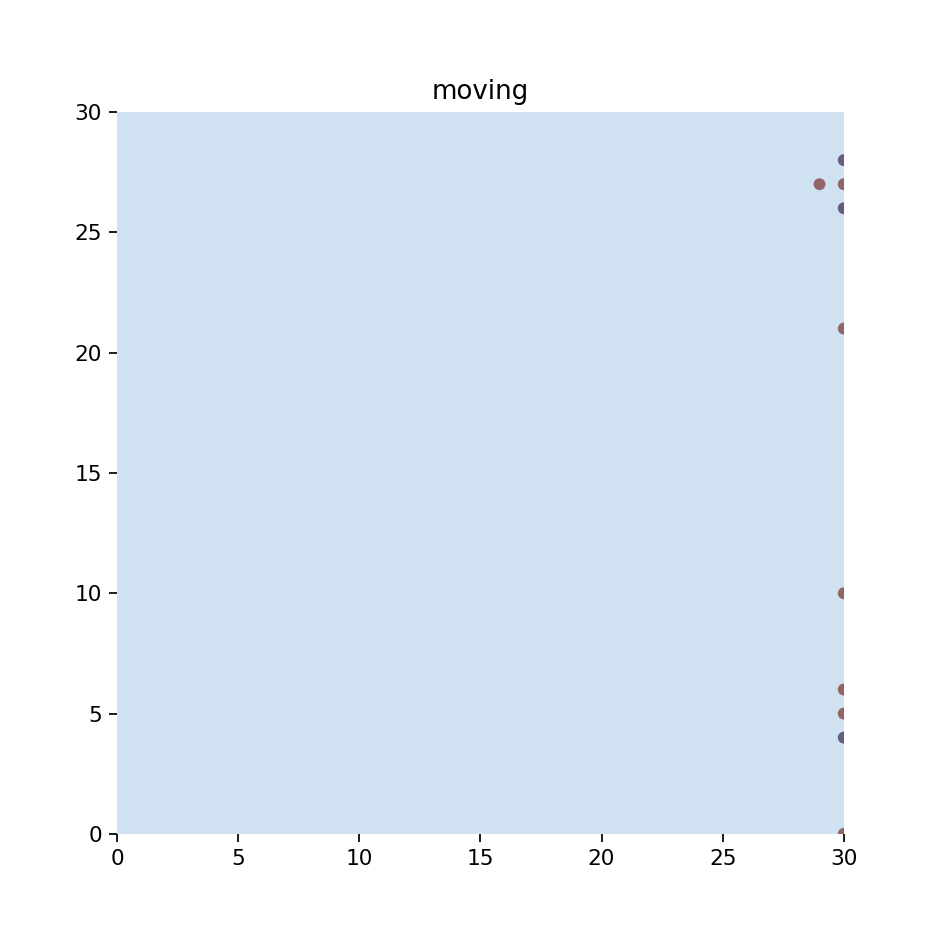

MovieWriter imagemagick unavailable; using Pillow instead.


5


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 450.31it/s]


<IPython.core.display.Javascript object>


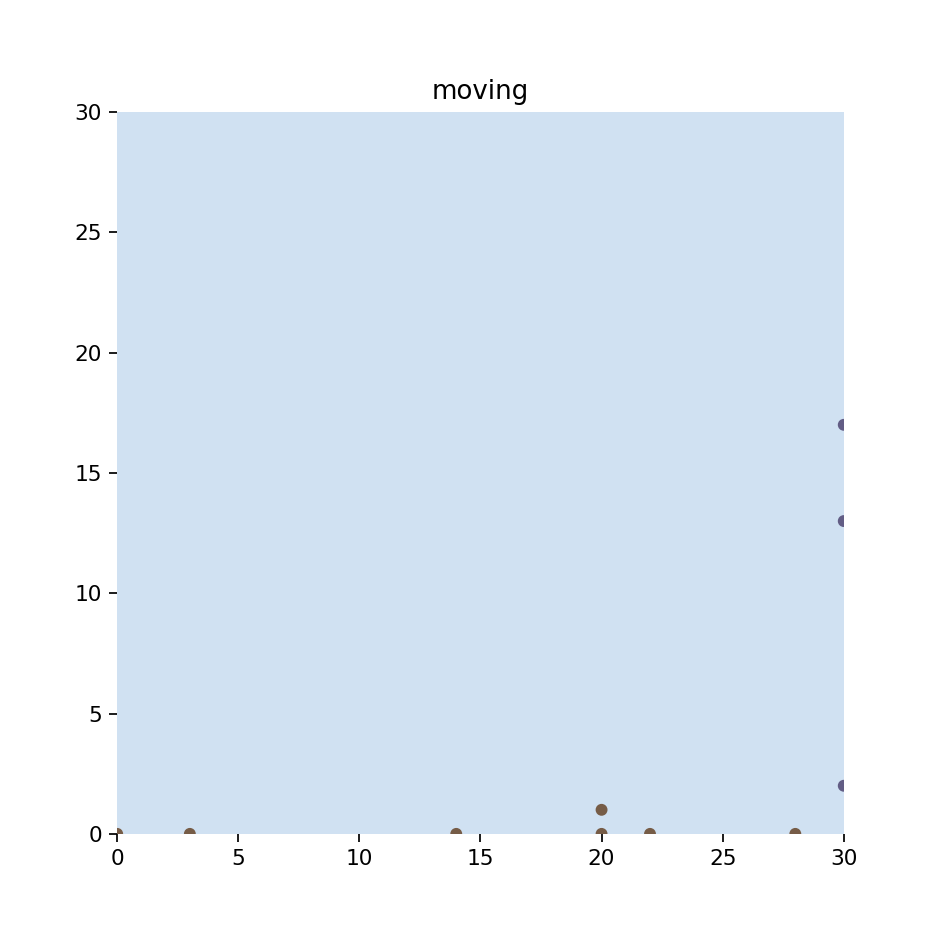

MovieWriter imagemagick unavailable; using Pillow instead.


6


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 492.52it/s]


<IPython.core.display.Javascript object>


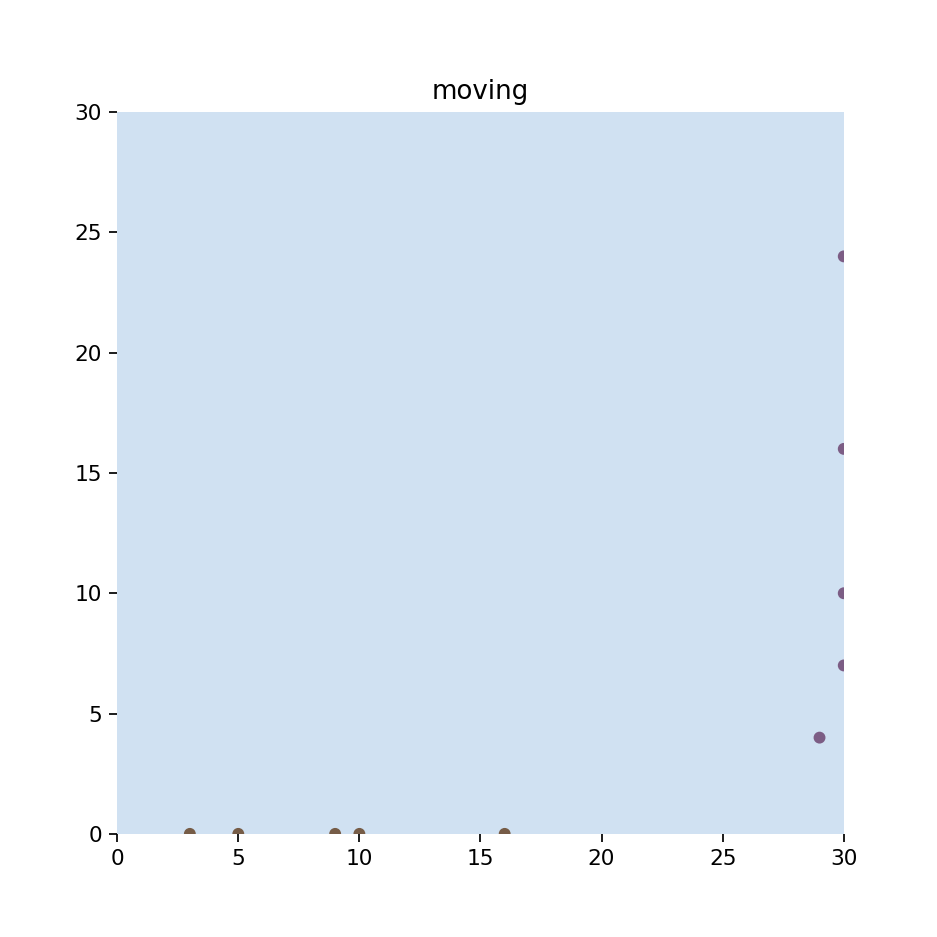

MovieWriter imagemagick unavailable; using Pillow instead.


7


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 427.60it/s]


<IPython.core.display.Javascript object>


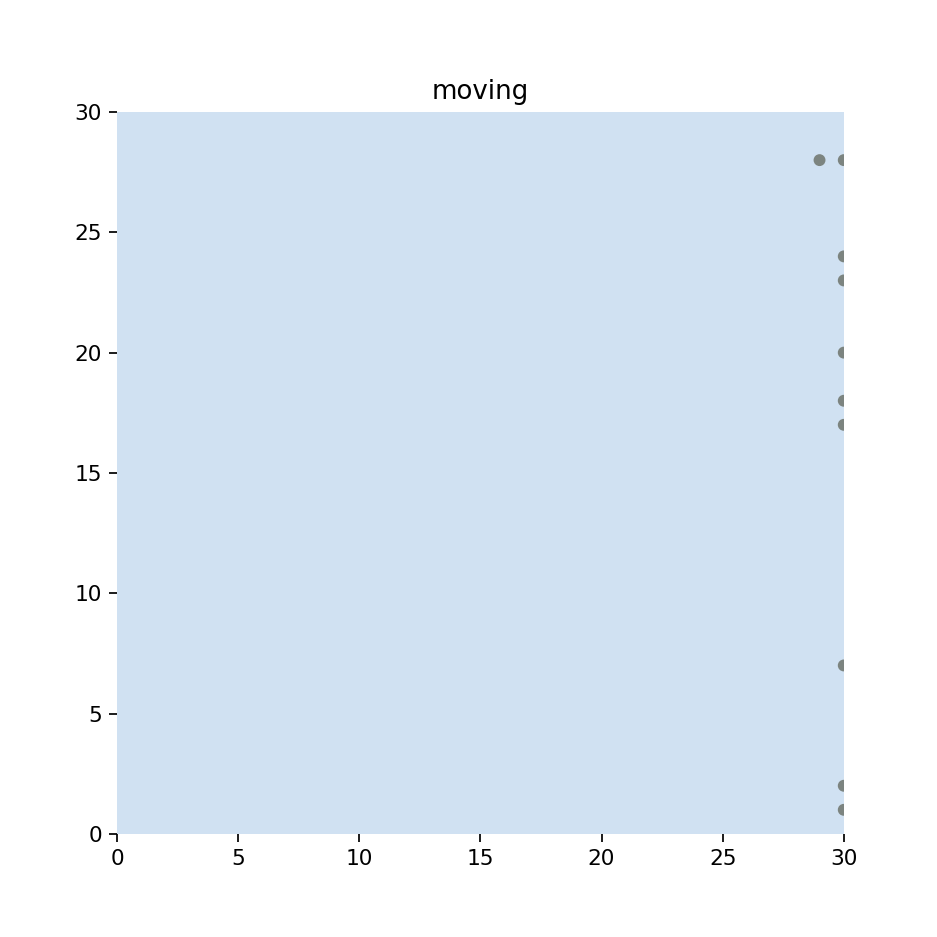

MovieWriter imagemagick unavailable; using Pillow instead.


8


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 365.94it/s]


<IPython.core.display.Javascript object>


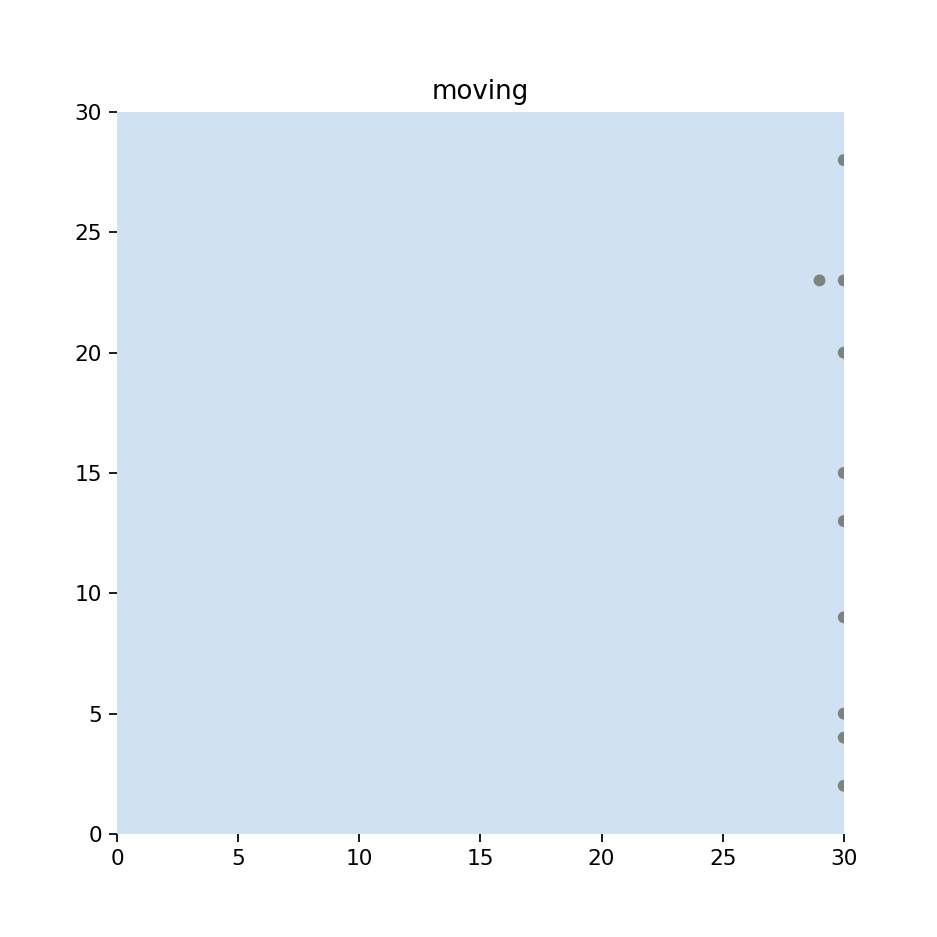

MovieWriter imagemagick unavailable; using Pillow instead.


9


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 363.91it/s]


<IPython.core.display.Javascript object>


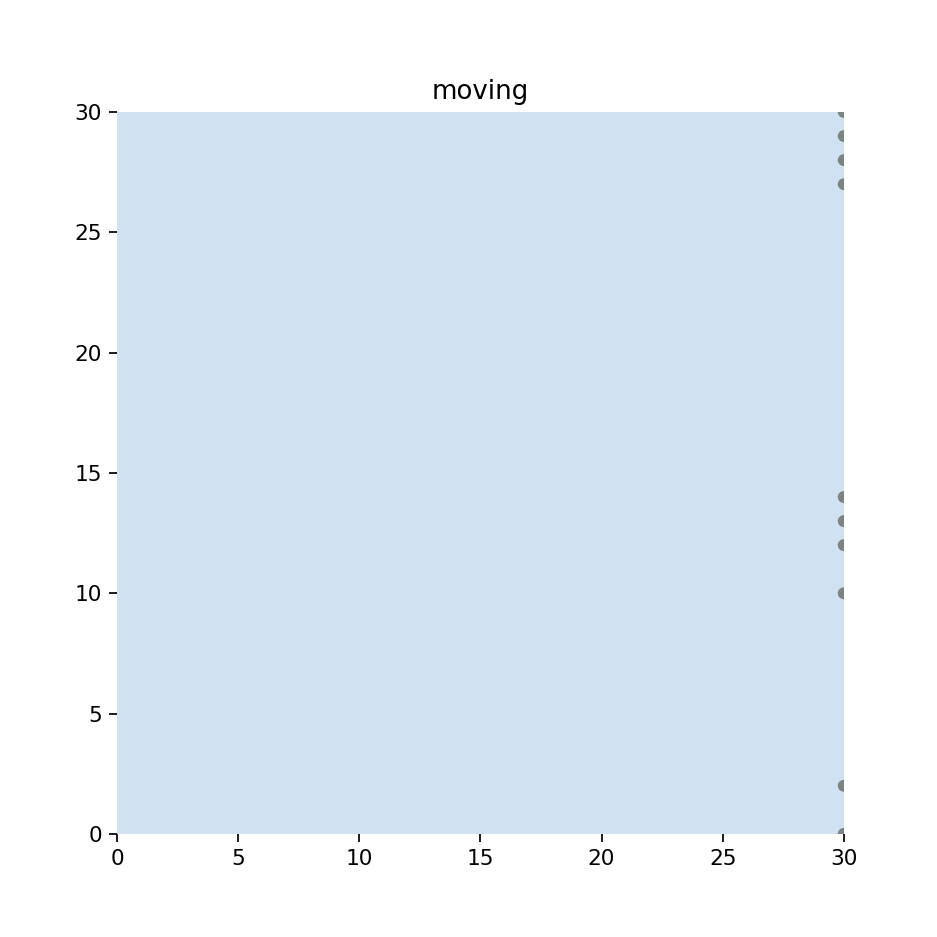

MovieWriter imagemagick unavailable; using Pillow instead.


In [13]:
result = {}
for gen_nr in range(10):
    print(gen_nr)
    if gen_nr == 0:
        result = initial_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner, world_size)
        result = steps_in_generation(world_size*2, result, world_size_x, world_size_y)
#         print(result[0])
    else:
        
        result = asexual_reproduction_and_mutation(world_size, result, nr_individuals)
        
        result = next_generation(result,nr_of_input, nr_of_actions, nr_of_inner, world_size, nr_individuals)
        result = steps_in_generation(world_size*2, result, world_size_x, world_size_y)

    result.update(result)
    
    dic_color = {}
    for indiv in result:
        rgb_colors = list(map(hex_to_rgb, result[indiv]['genome']))
        color = tuple(pd.DataFrame(rgb_colors).median()) 
        dic_color[indiv] = color
        
    coords = generate_dictionary_of_coords(result, world_size*2, dic_color)
    
    def update(i):
        ax.clear()
        ax.set_facecolor(plt.cm.Blues(.2))

        ax.set_xlim([0,world_size_x])
        ax.set_ylim([0,world_size_y])
        ax.set_title('moving')
        ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c=coords[i]['color'], s=20, marker='o')
        [spine.set_visible(False) for spine in ax.spines.values()]


    fig, ax = plt.subplots(figsize=(6,6))
    myAnimation = FuncAnimation(
        fig = fig,
        func = update,
        frames = len(coords),
        interval = 10, repeat=False
    )
    myAnimation.save(f'./output/generation-{gen_nr}.gif', writer='imagemagick' , fps=10)
    # create a binary pickle file 
    f = open(f'./output/generation-{gen_nr}.pkl',"wb")
    pickle.dump(dict,f)
    f.close()